In [39]:
import os
import tarfile
from six.moves import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
REMOTE_FILE = 'https://github.com/ageron/handson-ml/raw/refs/heads/master/datasets/housing/housing.tgz'
LOCAL_FILE = './housing.tgz'

def fetch_housing_data(remote_file=REMOTE_FILE, local_file=LOCAL_FILE):
    urllib.request.urlretrieve(remote_file, local_file)
    tgz_file = tarfile.open(local_file)
    tgz_file.extractall(path='./')
    tgz_file.close()

fetch_housing_data()

/var/folders/7p/zqwcy3w17072r8dpmkt69pp80000gn/T/ipykernel_76292/3566813872.py:7: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tgz_file.extractall(path='./')


In [6]:
housing_data = pd.read_csv('./housing.csv')

In [7]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
housing_data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [13]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

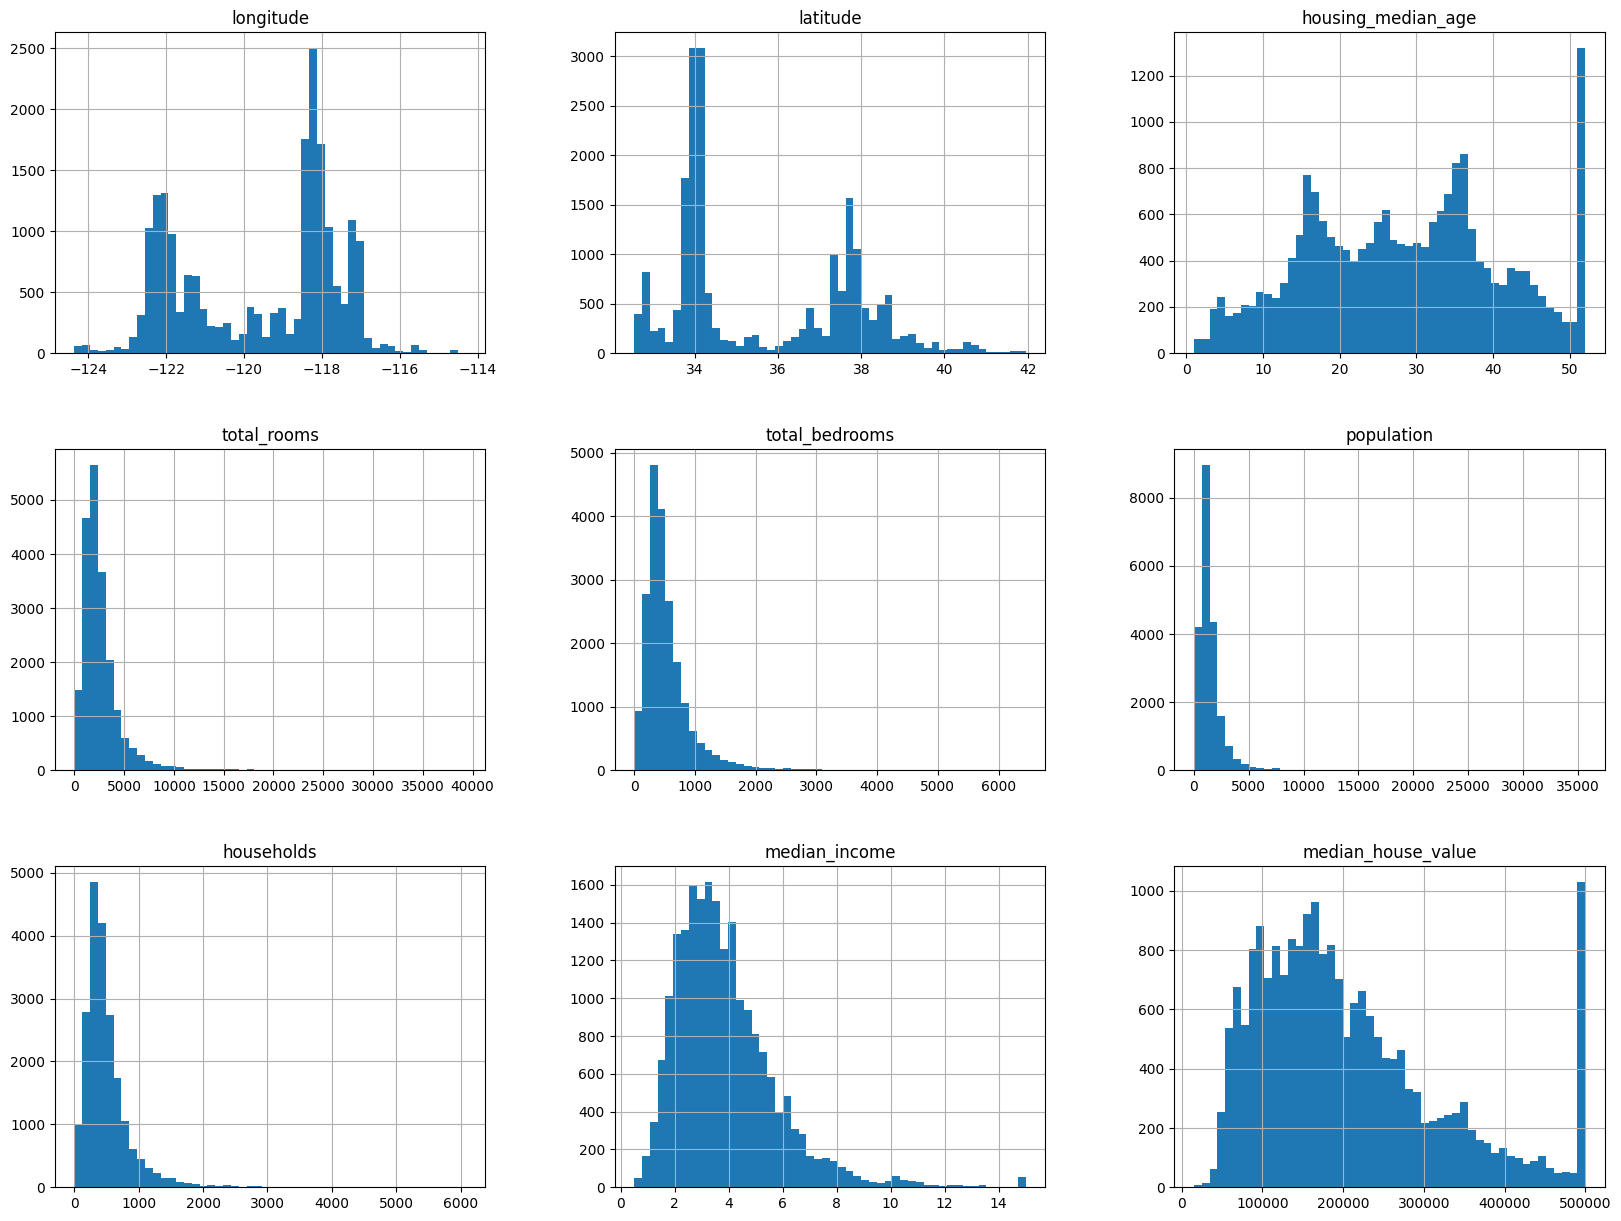

In [15]:
housing_data.hist(bins=50, figsize=(20, 15))

In [22]:
housing_data['income_class'] = np.ceil(housing_data['median_income'] / 1.5)
housing_data['income_class'] = housing_data['income_class'].where(housing_data['income_class'] < 5, 5.0)

<Axes: >

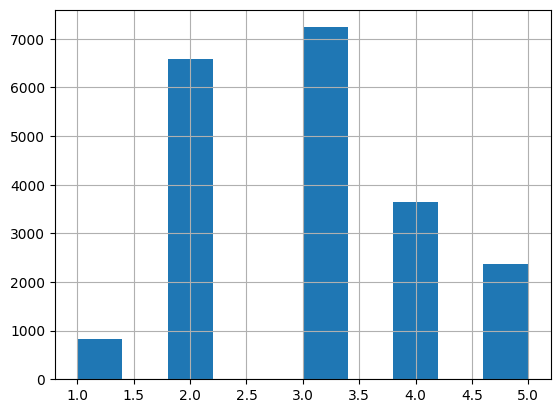

In [25]:
housing_data['income_class'].hist()

In [44]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_data, housing_data['income_class']):
    strat_train_set = housing_data.loc[train_index]
    strat_test_set = housing_data.loc[test_index]

for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_class', axis=1, inplace=True)

In [46]:
housing = strat_train_set.copy()
housing = housing.drop('ocean_proximity', axis=1)

<Axes: xlabel='longitude', ylabel='latitude'>

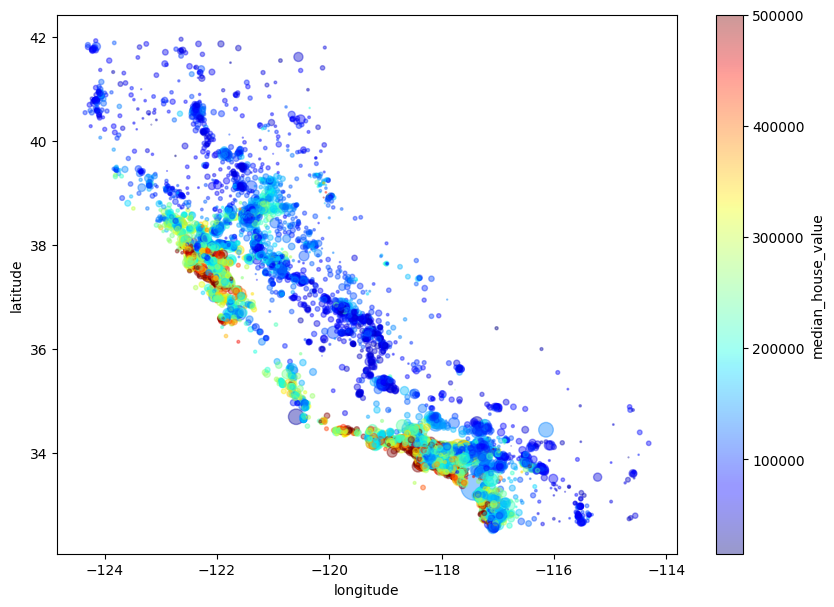

In [47]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
            s=housing['population'] / 100, figsize=(10, 7),
            c='median_house_value', cmap=plt.get_cmap('jet'))

In [49]:
housing.corr()['median_house_value']

longitude            -0.047466
latitude             -0.142673
housing_median_age    0.114146
total_rooms           0.135140
total_bedrooms        0.047781
population           -0.026882
households            0.064590
median_income         0.687151
median_house_value    1.000000
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

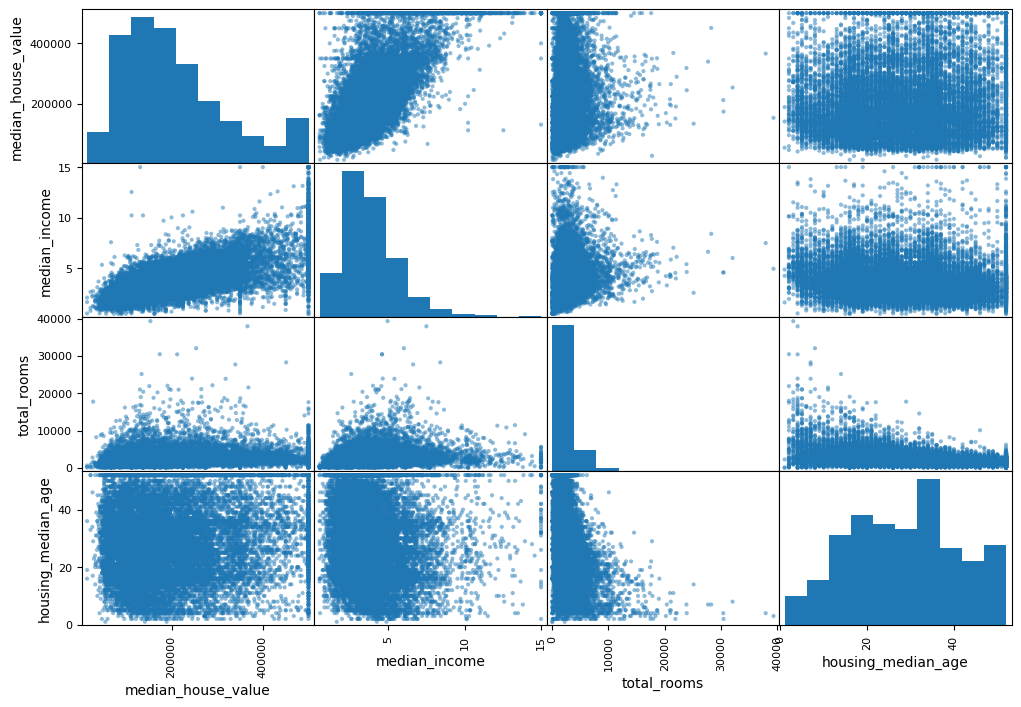

In [50]:
from pandas.plotting import scatter_matrix

attrs = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attrs], figsize=(12, 8))

In [51]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

In [52]:
corrs = housing.corr()
corrs['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [60]:
housing_features = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [70]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

housing_num = housing_features.drop('ocean_proximity', axis=1)

In [71]:
X_imputed = imputer.fit_transform(housing_num)
housing_tr = pd.DataFrame(X_imputed, columns=housing_num.columns)

In [72]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB


In [76]:
encoded1, categories1 = strat_train_set['ocean_proximity'].factorize()

In [93]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(strat_train_set['ocean_proximity'].values.reshape(-1, 1))

In [94]:
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [97]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesEnricher(BaseEstimator, TransformerMixin):
    def __init__(self, include_bedrooms_per_room = True):
        self.include_bedrooms_per_room = include_bedrooms_per_room

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]

        if self.include_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]

            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

## Transformation pipeline

In [104]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_enricher', CombinedAttributesEnricher()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [110]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y = None):
        return self

    def transform(self, X, y = None):
        return X[self.attribute_names].values

In [113]:
from sklearn.pipeline import FeatureUnion

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_enricher', CombinedAttributesEnricher()),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder', OneHotEncoder())
])

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

In [114]:
housing_prepared = full_pipeline.fit_transform(housing_features)

## Training!

### Linear regression

In [127]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [129]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
np.sqrt(lin_mse)

np.float64(68627.87390019129)

### Decision tree

In [130]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [131]:
tree_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, tree_predictions)
np.sqrt(tree_mse) # overfitting :( 

np.float64(0.0)

## Cross-validation

In [132]:
from sklearn.model_selection import cross_val_score

tree_reg_2 = DecisionTreeRegressor()
scores = cross_val_score(tree_reg_2, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [134]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Std:", scores.std())

In [135]:
display_scores(tree_rmse_scores)

Scores: [73408.22573204 71583.64150273 68080.75621709 71042.56807736
 70747.19701646 77845.61168702 69485.4509741  73328.71163971
 68362.11302373 70604.12191603]
Mean: 71448.83977862846
Std: 2727.7764927547073


In [136]:
lin_reg_2 = LinearRegression()
scores_lin_reg = cross_val_score(lin_reg_2, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
lin_reg_rmse_scores = np.sqrt(-scores_lin_reg)

display_scores(lin_reg_rmse_scores)

Scores: [71762.7642359  64114.99219824 67771.16886924 68635.19071696
 66846.14450095 72528.0373688  73997.08020455 68802.33584491
 66443.28845279 70139.80019322]
Mean: 69104.08025855417
Std: 2880.3279934152242


In [137]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
scores_forest = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)

display_scores(np.sqrt(-scores_forest))

Scores: [51594.72529047 48968.47145904 46947.22553997 52272.87694117
 47067.92203702 51872.68239181 52283.38473161 49895.86514303
 48297.96287368 54061.63675401]
Mean: 50326.27531618121
Std: 2318.417121236972


## Grid search

In [139]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

forest_reg_2 = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg_2, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [140]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [144]:
np.sqrt(-grid_search.best_score_)

np.float64(49958.96576504657)

In [150]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from scipy.stats import randint

forest_reg_3 = RandomForestRegressor()
params = {
    'n_estimators': randint(low=1, high=30),
    'max_features': randint(low=4, high=20)
}

random_grid_search = RandomizedSearchCV(forest_reg_3, params, cv=5, scoring='neg_mean_squared_error')
random_grid_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x16e4f6b10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x16e4f6c40>},
                   scoring='neg_mean_squared_error')

In [152]:
np.sqrt(-random_grid_search.best_score_)

np.float64(49829.88002856428)

### Finding influence of each attribute

In [158]:
feature_importances = random_grid_search.best_estimator_.feature_importances_

feature_importances

array([7.39470414e-02, 6.61123345e-02, 4.31642877e-02, 1.98206779e-02,
       1.91953487e-02, 2.05174143e-02, 1.80142419e-02, 3.32847207e-01,
       6.31754940e-02, 1.03140324e-01, 7.01208436e-02, 1.10414141e-02,
       1.50514554e-01, 2.94814378e-05, 3.18590770e-03, 5.17342798e-03])

In [159]:
extra_attribs = ['rooms_per_home', 'pop_per_home', 'bedrooms_per_room']
cat_one_hot_attribs = list(cat_pipeline.named_steps['cat_encoder'].categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

sorted(zip(feature_importances, attributes), reverse=True)

[(np.float64(0.3328472071330349), 'median_income'),
 (np.float64(0.15051455376337294), 'INLAND'),
 (np.float64(0.10314032390969657), 'pop_per_home'),
 (np.float64(0.07394704143425603), 'longitude'),
 (np.float64(0.0701208435679905), 'bedrooms_per_room'),
 (np.float64(0.06611233451976362), 'latitude'),
 (np.float64(0.06317549404311132), 'rooms_per_home'),
 (np.float64(0.04316428768643543), 'housing_median_age'),
 (np.float64(0.020517414256407303), 'population'),
 (np.float64(0.019820677874515052), 'total_rooms'),
 (np.float64(0.019195348668677684), 'total_bedrooms'),
 (np.float64(0.018014241929068052), 'households'),
 (np.float64(0.01104141409976895), '<1H OCEAN'),
 (np.float64(0.005173427979598687), 'NEAR OCEAN'),
 (np.float64(0.003185907696474544), 'NEAR BAY'),
 (np.float64(2.9481437828594497e-05), 'ISLAND')]

## Evaluation on test data set

In [161]:
final_model = random_grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, predictions)
np.sqrt(final_mse)

np.float64(48243.47419548764)